# Project: Investigate a Dataset - [No show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

_For this project data set is  No-show appointments provided by [kaggle]("https://www.kaggle.com/datasets/joniarroba/noshowappointments")_ <br> 
<h1> The no show appointment <br></h1>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.<br>
    <ul>
<li>	‘ScheduledDay’ tells us on what day the patient set up their appointment. </li>
<li>	‘Neighborhood’ indicates the location of the hospital.</li>
<li>	 ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>	 Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
    </ul>
        
   Data Dictionary
<ul>
<li>01 - PatientId</li> 
Identification of a patient
<li>02 - AppointmentID</li>
Identification of each appointment
<li>03 - Gender</li>
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
<li>04 - ScheduledDay</li>
The day of the actuall appointment, when they have to visit the doctor.
<li>05 - AppointmentDay</li>	
The day someone called or registered the appointment, this is before appointment of course.
<li>06 - Age</li>
How old is the patient.
<li>07 - Neighbourhood</li>
Where the appointment takes place.
<li>08 - Scholarship</li>
True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
<li>09 - Hipertension</li>
True or False
<li>10 - Diabetes/li>
True or False
<li>11 - Alcoholism</li>
True or False
<li>12 - Handcap</li>
True or False
<li>13 - SMS_received</li>
1 or more messages sent to the patient.
<li>14 - No-show</li>
True or False.
</ul>


## Questions for Analysis

1.	What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<br>
a)	What gender is more likely to not to show up?<br>
b)	What age groups are more likely to not show up? <br>
c) 	What’s the correlation between the diagnosis of the patient and showing up? <br>
d) 	Does the time gap between the scheduled day and appoinmtment day affect the likelyhood of a patient  to show up?<br>



### Importing the libraries 

In [1]:
#importing the packages that willl be used in this project 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['agg.path.chunksize'] = 10000
sns.set_style('darkgrid')





<a id='wrangling'></a>
## Data Wrangling
* in this section the data set will be loaded and studied for any error or incositensy thereafter it will be cleaned 

In [2]:
#assigning a variable df  to load the data set noshowappointments-kagglev2-may-2016.csv
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   

         AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No

#### General description

In [3]:
#showing the summary of the dataset
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

* the above output gives the full description of the data features the count , mean, min and maximum values

* for further verification we will confirm there is  if there are any null values it is important that the data  does not have any null and it is complete.

In [4]:
df.isnull().any()
#making sure there is no null values in the data set

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

* The data has no null values therefore there is no need of dropping any columns or rows 

Next we check for duplicates in this dataset, it is importanant that the patient ID is not reapeted to avoid inaccuarte findings 

In [5]:
df.duplicated().sum()

0

In [6]:
#checking the number of columns and rows 
df.shape

(110527, 14)

### Data Cleaning

##### This section we be making the necessary changes in order for the codes to run smoothly
* removing "-" and replacing it with "_" on all columns that have it, and changing the upper caps in lower caps of the each column name for easy access through the code 

In [7]:

# the fuction will renaming the column names 

df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

* Here we will be converting columns into booleen data types

In [8]:
#used the replace fuction 
df['no_show'] = df['no_show'].replace(['Yes','No'],['1','0'])
df.no_show.unique()

array(['0', '1'], dtype=object)

The No show
* Yes = 1
* No = 0

In [9]:
#changing the data type to type int
df['no_show'] = df['no_show'].astype(int, errors = 'raise')


In [10]:
#used the replace fuction 
df['gender'] = df['gender'].replace(['F','M'],['1','0'])
df.gender.unique()


array(['1', '0'], dtype=object)

Gender 
* female = 1
* male = 0

In [11]:
#changing the data type
df['gender'] = df['gender'].astype(float, errors = 'raise')

* finding the unique values of each column

In [12]:
#finding the number of unique values in each feature 
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no_show                2
dtype: int64

#### Visualizing the data features 

* In this section we will find the distribution of each feature using histograms and their correlation 

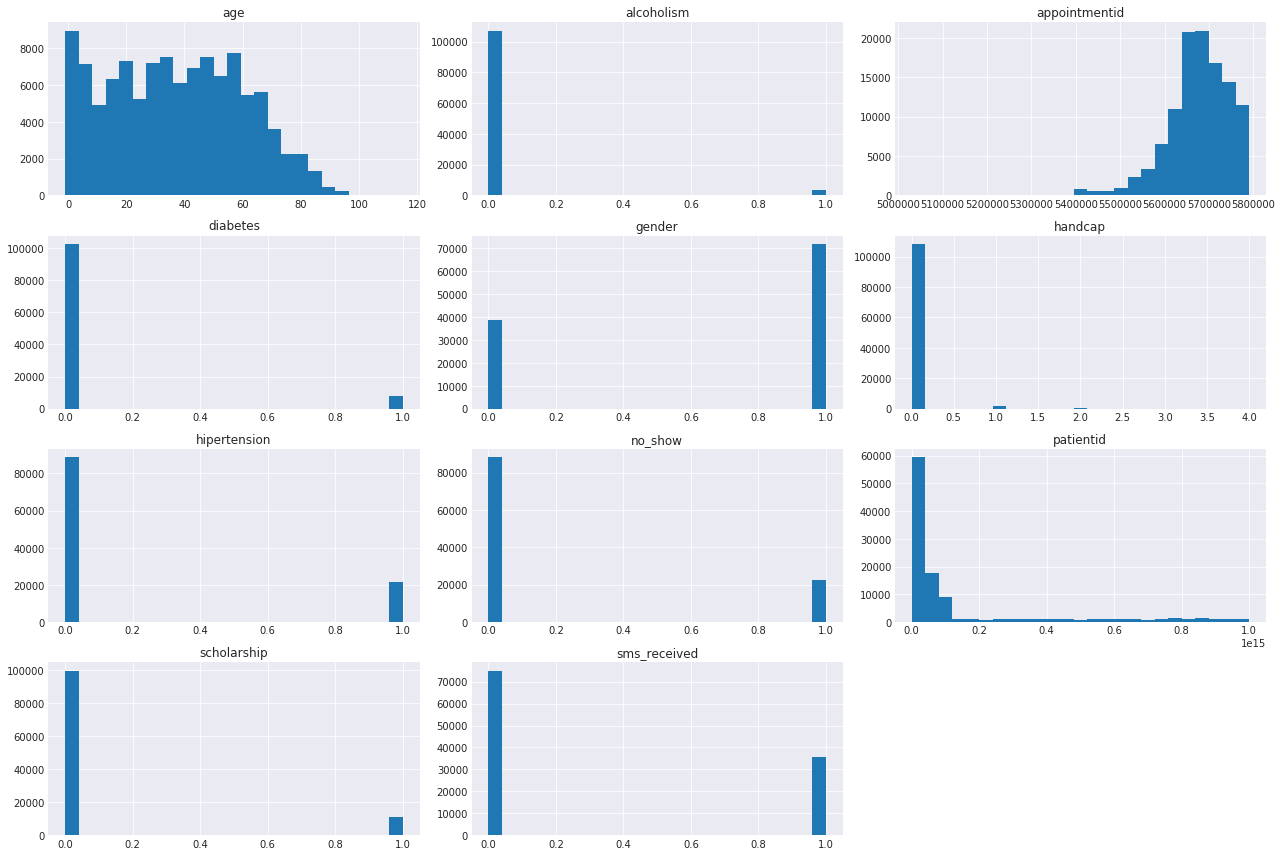

In [13]:
#check the distrubution of each feature
df.hist(figsize=(12,8), bins =25,  xlabelsize=10, ylabelsize=10)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.show()

Majority of the features are boolean either one or zero / yes or no 

#### Next we will measure the relationship between each feature using a correlation matrix, this will help us understand the data given to us.

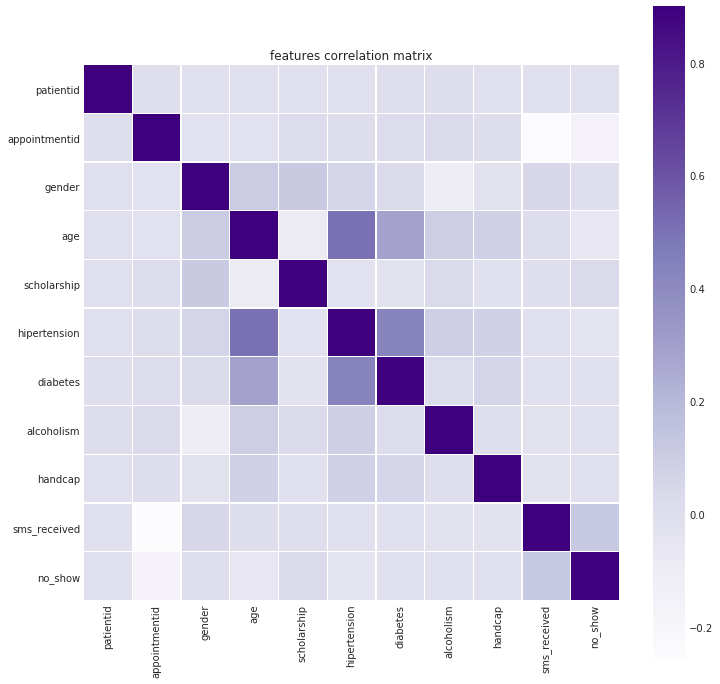

In [14]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), cmap = "Purples", vmax = 0.9, square = True, linewidth = 0.30 )
plt.title("features correlation matrix")
plt.show()


There is medium to low correlation among the following features </br>

* sms received and no show the correlation is equivalent to 0.2
* age and the diagnosisi of the patient especialy between age vs Hipertension and  age vs diabetes.
* scholarship  vs no show the relationship is weak equals -0.2 
* No_show vs gender the correlation is equvalent to (0.0)
* gender vs the diagnosis of the patient have a high correllation 

We explore the relationship by Visualizing of the relationship among the following features highlighted above 
* sms recieved and No show
* Scholarship and No show
* Gender and the Diagnosis given

#### a) sms recieved and No show
* In the visualisation below it shows that the number of patients that did not show up for their appointment and did receive the sms is higher than the number of patients that did receive the the SMS and showed up



In [15]:
df.loc[:, 'no_show'] = df.loc[:, 'no_show'].apply(lambda x: 0 if x == 0 else 1 )
df.groupby('sms_received').mean().loc[:, 'no_show']

sms_received
0    0.167033
1    0.275745
Name: no_show, dtype: float64

* People that received an sms have 16% chance of not showing up
* People who did receive an sms have a 27 % chance of not showing up.

#### b) Scholarship vs No show 
* below we are looking at the patients awarded the scholarship and show up for their appointments 


Text(0,0.5,'Count')

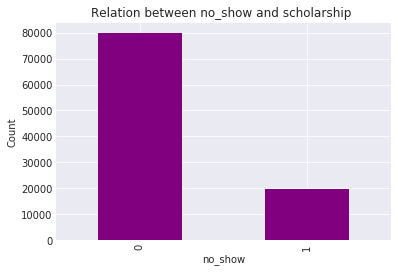

In [16]:
df[df.scholarship == 1]['no_show'].value_counts().plot.bar()
df[df.scholarship == 0]['no_show'].value_counts().plot.bar(color = 'purple')
plt.title('Relation between no_show and scholarship ')
plt.xlabel('no_show')
plt.ylabel('Count')

* There was little to no correlation between the scholarship and the no show feature, patients awarded the scholarship are more likely not to show up for their appointmnets than the one who arent awarded

#### C) Gender and the Diagnosis
* Below we are illustrateing the Correlation between gender and patients condition (hipertension, alcoholism, daibetes and handcap) we saw in the correlation matrix 

Text(0,0.5,'Count')

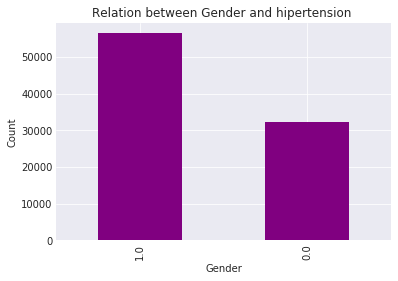

In [17]:
#ploting against gender 
df[df.hipertension == 1]['gender'].value_counts().plot.bar()
df[df.hipertension == 0]['gender'].value_counts().plot.bar(color = 'purple')
plt.title('Relation between Gender and hipertension ')
plt.xlabel('Gender')
plt.ylabel('Count')

* The chart shows there females have a high count in hipertension than the fameles 

Text(0,0.5,'Count')

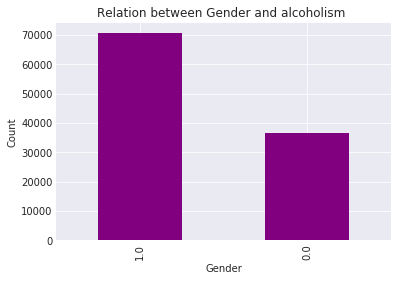

In [18]:
df[df.alcoholism == 1]['gender'].value_counts().plot.bar()
df[df.alcoholism == 0]['gender'].value_counts().plot.bar(color = 'purple')
plt.title('Relation between Gender and alcoholism ')
plt.xlabel('Gender')
plt.ylabel('Count')

* in this chart the female count is higher than the male count in hipertension condition, while there is aslight difference in the mae count between the two

Text(0,0.5,'Count')

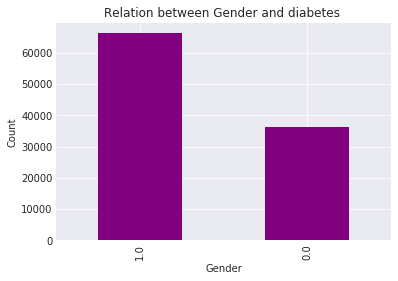

In [19]:
df[df.diabetes == 1]['gender'].value_counts().plot.bar()
df[df.diabetes == 0]['gender'].value_counts().plot.bar(color = 'purple')
plt.title('Relation between Gender and diabetes ')
plt.xlabel('Gender')
plt.ylabel('Count')

* in this chart diabetes has a higher female count that hipertension 

Text(0,0.5,'Count')

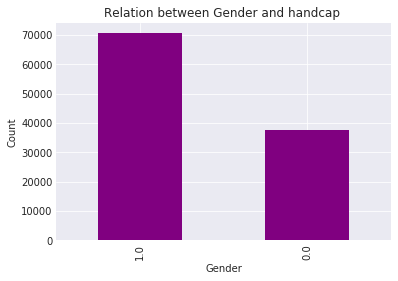

In [20]:
df[df.handcap >= 1]['gender'].value_counts().plot.bar()
df[df.handcap == 0]['gender'].value_counts().plot.bar(color = 'purple')
plt.title('Relation between Gender and handcap ')
plt.xlabel('Gender')
plt.ylabel('Count')

* in this chart the handcap condition the female and male count is almosts similar to the alcoholism condintion

The correlation between the conditions and the Gender is that the females and males count in the hand cap and alcoholism is high than the rest of the conditions, while hipertention has the lowest male and female count than the rest of the conditions 

#### Further exporation 

* This chart breaks down the relationship between the features of people from the data set using a scatter plot

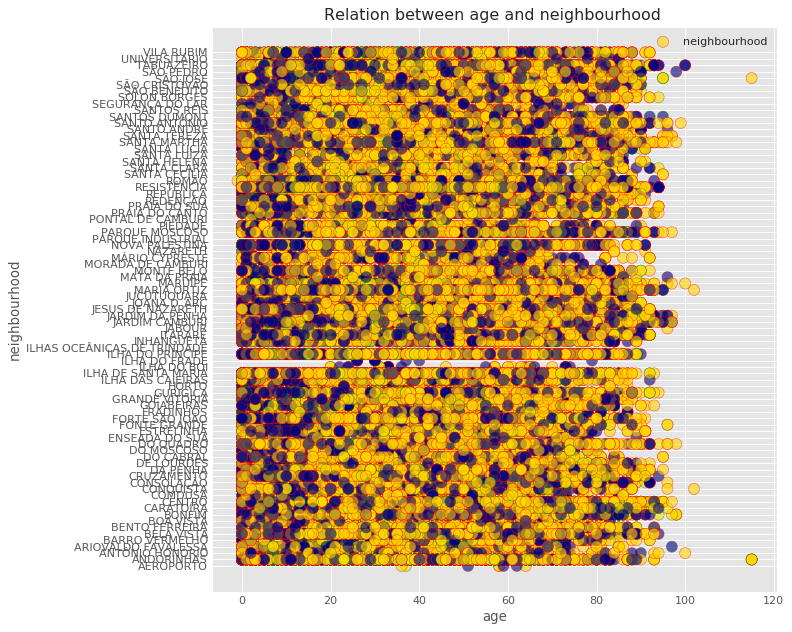

In [21]:
from matplotlib.pyplot import figure
color = df['gender'].apply(lambda x: 'navy' if x == 0.0 else 'gold')
#setting the female as gold and males are green
bcolor = df['no_show'].apply(lambda x: 'red' if x == 0 else 'green')
# this line set the the color of the outerline of a circle,  show up is green, no show up red
figure(figsize=(10, 8), dpi=80)

plt.style.use('ggplot')

plt.title('Relation between age and neighbourhood ')
plt.xlabel('age')
plt.ylabel('neighbourhood')
plt.scatter(x=df['age'],y=df['neighbourhood'],s=100,c=color,alpha=0.6,marker='o',edgecolors=bcolor)
#plt.scatter(x=df['datediff'],y=df['neighbourhood'],s=100,c=color,alpha=0.5,marker='h',edgecolors=bcolor)

plt.legend(loc='upper right')


plt.tight_layout()

plt.show()

##### The purpuse of this chart is to visualize the relationship betweeen the variables and see the nature of relationships
y-axis shows the neighbourhoods and x-axis shows the age and each dot represents a person in this dataset.
* we see the neighbourhoods and ages of each person, and the neighbourhoods with more females or males , and people who showed up and did not showup from each neighbourhood  <br>


  * red  that covers a circle indicated the people who did not showed up<br>
  * green  that covers a circle show the people who showed up (there are not so many as you can see in the graph) <br>
  * gold are the females <br>
  * navy  are the males <br>

<a id='eda'></a>
# Exploratory Data Analysis

## Questions for Analysis

1.	What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<br>
a)	What gender is more likely to not to show up?<br>
b)	What age groups are more likely to not show up? <br>
c) 	What’s the correlation between the diagnosis of the patient and showing up? <br>
d) 	Does the time gap between the scheduled day and appoinmtment day affect the likelyhood of a patient  to show up?<br>



### Solutions

**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**<br>
   * In this step we will be defining the dependent variables ( *age, gender, Diagnosis, date diff*) and indepedent variable (*no_show*)
* Comparing each feature with the No show , to determine which factors to be considered when determining which patients are more likely to show up for their appointments 

### 1.  Gender 
* What age groups are more likely to not show up

In [22]:
def percentage (n,d):
    """Just to compupte the percentage of a value
    
    Parameters
    ----------
    n, d : male or female
       
 
    Returns
    -------
    the total percentage of the genders
        
    """
    total = n + d
    return (n/total)*100

In [23]:
#let explore the Gender column variable 
gender = df.gender.value_counts()

In [24]:
#calculate the percentage 
female_percentage = percentage(gender[1], gender[0])
male_percentage = percentage(gender[0], gender[1])
print(f"{round(female_percentage, 2)}% of the dataset are female while {round(male_percentage, 2)} % are male")

65.0% of the dataset are female while 35.0 % are male


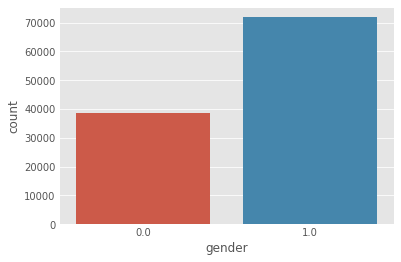

In [25]:
#plotting the gender feature 
sns.countplot(x ='gender', data = df)
#male =0 female = 1

* the above chart is an illustration of the count of the genders 

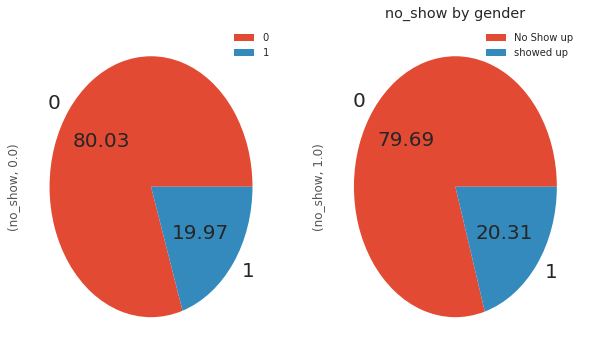

In [26]:
#plotting the no show vs Gender
pd.DataFrame(df.groupby('gender')['no_show'].value_counts(normalize =True)).unstack(0).plot(kind = 'pie', subplots = True, autopct="%.2f",  fontsize=20,
    figsize=(10, 6))
plt.title( "no_show by gender" )
plt.legend(["No Show up", "showed up"])

#### Answer

* The females have a high count than males 
* The chart indicates that are equally more likely not show up for their appointments <br>

_NB_ :
no_show vs 0 ( Male)
no_show vs 1  (Female) 
(no show),
showed up vs 0.0 (Male)
showed up vs 1.0  (Female )
(showed)

### 2. Age
#### b)	What age groups are more likely to not show up ?

* The ages are between 0 to 100

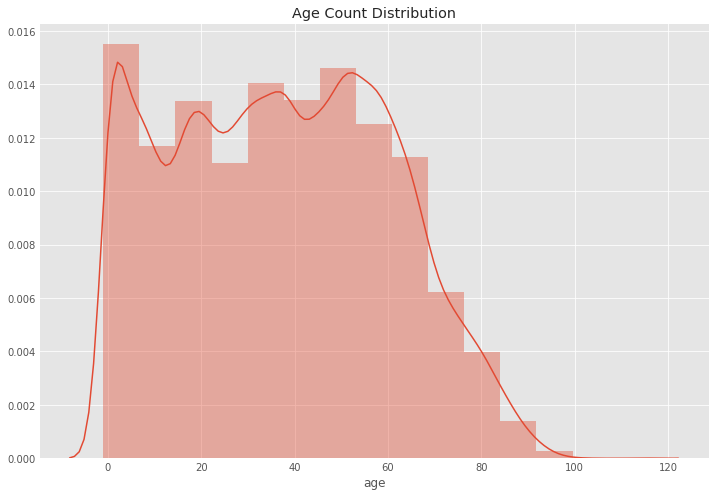

In [27]:
#   the age attribute has 104 unique ages, we will seperate them into groups 
#first let view the distrubution of the ageusing distribution plot 
plt.figure(figsize=(12,8))
sns.distplot(df['age'], bins = 15)
plt.title('Age Count Distribution')
plt.show()

* it shows the distrubtion of the different ages of the patients 

In [28]:
df.loc[:, 'age_grp'] = pd.cut(df['age'], bins= [0,13,40,90], labels = ['childs' , 'aldults', 'seniors'])
df.groupby('age_grp').mean().loc[:, 'no_show']

age_grp
childs     0.213495
aldults    0.236405
seniors    0.172302
Name: no_show, dtype: float64

* Children have 21 % chance of not showing up
* aldults hav 23 % chance of not showing up, *people of this range have the highest no show rate*
* seniors have 17 % chance of not showing up


In [29]:
#finding the median of age 
df.age.median()

37.0

Finding the median helps in separating the ages into groups 
* next step we divide them from 0- 36 (which will be the younger generation) and 37 -100 (which will be the older generation)

In [30]:
#separate the age into groups by selecting age of patients over 37
df_a = df[df['age'] >= 37]
df_a.count()
#df_a is the older genration

patientid         55943
appointmentid     55943
gender            55943
scheduledday      55943
appointmentday    55943
age               55943
neighbourhood     55943
scholarship       55943
hipertension      55943
diabetes          55943
alcoholism        55943
handcap           55943
sms_received      55943
no_show           55943
age_grp           55635
dtype: int64

In [31]:
#repeat the above step with for people below 37
df_b = df[df['age'] <= 36]

df_b.count()
#df_b is the younger genration

patientid         54584
appointmentid     54584
gender            54584
scheduledday      54584
appointmentday    54584
age               54584
neighbourhood     54584
scholarship       54584
hipertension      54584
diabetes          54584
alcoholism        54584
handcap           54584
sms_received      54584
no_show           54584
age_grp           51044
dtype: int64

In [32]:
display(df_a, df_b)
#display some few columns and row for each age group 

patientid  appointmentid  gender          scheduledday  \
0       2.987250e+13        5642903     1.0  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503     0.0  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549     1.0  2016-04-29T16:19:04Z   
4       8.841186e+12        5642494     1.0  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772     1.0  2016-04-27T08:36:51Z   
7       3.449833e+12        5630575     1.0  2016-04-27T15:39:58Z   
14      9.988472e+13        5633951     1.0  2016-04-28T10:06:24Z   
16      8.457439e+13        5633121     0.0  2016-04-28T08:51:47Z   
17      1.479497e+13        5633460     1.0  2016-04-28T09:28:57Z   
19      7.223289e+12        5640433     1.0  2016-04-29T10:43:14Z   
23      2.137540e+14        5634142     1.0  2016-04-28T10:27:05Z   
24      8.734858e+12        5641780     1.0  2016-04-29T14:19:19Z   
25      5.819370e+12        5624020     0.0  2016-04-26T15:04:17Z   
26      2.578785e+10        5641781     1.0  2016-04-29T14:19:42Z   
28      5.926172e+12        5642400     0.0  2016-04-29T15:48:02Z   
30      3.428156e+11        5628068     1.0  2016-04-27T10:24:52Z   
32      5.288356e+13        5637908     0.0  2016-04-29T07:30:27Z   
33      7.653517e+12        5616921     1.0  2016-04-25T15:01:04Z   
34      1.999976e+13        5637963     1.0  2016-04-29T07:34:30Z   
36      7.298459e+13        5637975     1.0  2016-04-29T07:35:19Z   
37      1.578132e+12        5637986     1.0  2016-04-29T07:35:56Z   
38      5.873316e+12        5609446     0.0  2016-04-20T15:54:18Z   
39      1.455623e+13        5639644     1.0  2016-04-29T09:21:13Z   
40      9.968684e+14        5635881     1.0  2016-04-28T14:14:16Z   
41      8.224325e+14        5633339     1.0  2016-04-28T09:20:36Z   
42      2.596543e+13        5632906     1.0  2016-04-28T08:34:54Z   
43      7.155896e+13        5641620     1.0  2016-04-29T14:02:16Z   
44      2.741649e+11        5635414     1.0  2016-04-28T13:27:27Z   
46      1.379437e+11        5615608     0.0  2016-04-25T12:44:36Z   
47      5.894585e+11        5633116     1.0  2016-04-28T08:51:26Z   
...              ...            ...     ...                   ...   
110480  3.492935e+11        5606687     1.0  2016-04-20T10:33:54Z   
110482  5.944225e+14        5639147     1.0  2016-04-29T08:45:44Z   
110483  1.642781e+12        5769404     1.0  2016-06-03T08:47:58Z   
110484  5.133650e+14        5772155     1.0  2016-06-03T14:43:56Z   
110486  3.184153e+14        5788099     1.0  2016-06-08T11:14:23Z   
110488  7.935892e+14        5760379     0.0  2016-06-01T14:47:12Z   
110490  3.252624e+14        5787975     0.0  2016-06-08T10:55:45Z   
110491  7.565622e+11        5787950     1.0  2016-06-08T10:52:27Z   
110494  2.895817e+14        5779073     1.0  2016-06-06T17:44:14Z   
110495  7.499489e+12        5759838     0.0  2016-06-01T13:49:47Z   
110496  8.544295e+13        5779046     1.0  2016-06-06T17:35:38Z   
110497  7.935892e+14        5757745     0.0  2016-06-01T09:46:33Z   
110498  9.433654e+13        5787655     1.0  2016-06-08T10:21:14Z   
110499  8.219692e+14        5757697     1.0  2016-06-01T09:42:56Z   
110500  4.434384e+14        5787233     1.0  2016-06-08T09:35:13Z   
110501  4.544252e+11        5758133     0.0  2016-06-01T10:19:12Z   
110503  2.362182e+13        5759473     1.0  2016-06-01T13:00:36Z   
110505  5.667344e+13        5758455     1.0  2016-06-01T10:45:50Z   
110508  9.433654e+13        5757656     1.0  2016-06-01T09:41:00Z   
110510  2.362182e+13        5757587     1.0  2016-06-01T09:35:48Z   
110512  9.876246e+13        5786368     1.0  2016-06-08T08:20:01Z   
110514  2.695685e+12        5786567     1.0  2016-06-08T08:35:31Z   
110516  6.923772e+13        5780205     1.0  2016-06-07T07:45:16Z   
110518  7.263315e+13        5630375     1.0  2016-04-27T15:15:06Z   
110520  9.969977e+14        5650534     1.0  2016-05-03T07:51:47Z   
110521  3.635534e+13        5651072     1.0  2016-05-03T08:23:40Z   
110522  2

patientid  appointmentid  gender          scheduledday  \
3       8.679512e+11        5642828     1.0  2016-04-29T17:29:31Z   
6       7.336882e+14        5630279     1.0  2016-04-27T15:05:12Z   
8       5.639473e+13        5638447     1.0  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123     1.0  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213     1.0  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163     0.0  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718     1.0  2016-04-28T11:33:51Z   
13      9.113946e+14        5636249     0.0  2016-04-28T14:52:07Z   
15      9.994839e+10        5620206     1.0  2016-04-26T08:47:27Z   
18      1.713538e+13        5621836     1.0  2016-04-26T10:54:18Z   
20      6.222575e+14        5626083     1.0  2016-04-27T07:51:14Z   
21      1.215484e+13        5628338     1.0  2016-04-27T10:50:45Z   
22      8.632298e+14        5616091     0.0  2016-04-25T13:29:16Z   
27      1.215484e+13        5628345     1.0  2016-04-27T10:51:45Z   
29      1.225776e+12        5642186     1.0  2016-04-29T15:16:29Z   
31      3.112849e+11        5628907     0.0  2016-04-27T12:07:14Z   
35      7.816264e+13        5637968     0.0  2016-04-29T07:34:42Z   
45      4.982379e+12        5635842     1.0  2016-04-28T14:11:24Z   
49      9.223559e+13        5534656     1.0  2016-03-31T17:11:17Z   
50      1.827172e+14        5534661     1.0  2016-03-31T17:12:45Z   
51      4.694699e+13        5534635     1.0  2016-03-31T17:05:31Z   
52      7.987570e+14        5534639     1.0  2016-03-31T17:06:17Z   
53      4.438587e+14        5637909     0.0  2016-04-29T07:30:31Z   
54      3.371889e+12        5638164     1.0  2016-04-29T07:46:08Z   
55      4.179932e+13        5638018     0.0  2016-04-29T07:37:45Z   
56      4.751189e+14        5600005     0.0  2016-04-19T09:47:43Z   
57      3.996740e+12        5638466     0.0  2016-04-29T08:03:51Z   
58      4.487944e+10        5638235     0.0  2016-04-29T07:50:15Z   
59      7.184428e+13        5638545     1.0  2016-04-29T08:08:43Z   
60      9.291168e+12        5628739     0.0  2016-04-27T11:32:14Z   
...              ...            ...     ...                   ...   
110458  9.968524e+14        5770114     1.0  2016-06-03T09:45:25Z   
110460  4.321846e+13        5769545     1.0  2016-06-03T08:56:51Z   
110461  3.346245e+12        5628114     1.0  2016-04-27T10:29:36Z   
110462  9.848895e+14        5769406     1.0  2016-06-03T08:48:00Z   
110463  8.567868e+12        5627377     1.0  2016-04-27T09:24:46Z   
110466  8.222960e+11        5772302     1.0  2016-06-03T15:06:15Z   
110467  7.682333e+13        5782376     0.0  2016-06-07T11:06:56Z   
110470  4.125933e+12        5692391     1.0  2016-05-12T15:12:01Z   
110472  3.124195e+13        5780919     0.0  2016-06-07T08:45:22Z   
110473  7.555300e+11        5779851     0.0  2016-06-07T07:19:54Z   
110474  1.538134e+13        5779995     0.0  2016-06-07T07:28:05Z   
110478  5.478497e+12        5671780     1.0  2016-05-09T07:11:08Z   
110479  4.455244e+12        5638153     1.0  2016-04-29T07:45:43Z   
110481  4.383634e+11        5685319     1.0  2016-05-11T10:08:44Z   
110485  4.865334e+12        5762486     1.0  2016-06-02T07:49:14Z   
110487  1.891645e+12        5786423     0.0  2016-06-08T08:24:51Z   
110489  7.874370e+14        5788924     1.0  2016-06-08T13:54:16Z   
110492  6.456342e+14        5786741     0.0  2016-06-08T08:50:19Z   
110493  1.712135e+11        5788054     0.0  2016-06-08T11:06:40Z   
110502  7.316229e+14        5787937     1.0  2016-06-08T10:50:42Z   
110504  9.947983e+12        5788052     1.0  2016-06-08T11:06:21Z   
110506  8.973883e+11        5758779     0.0  2016-06-01T11:09:20Z   
110507  4.769462e+14        5786918     1.0  2016-06-08T09:04:18Z   
110509  4.952968e+14        5786750     0.0  2016-06-08T08:50:51Z   
110511  8.235996e+11        5786742     1.0  2016-06-08T08:50:20Z   
110513  8.674778e+13        5785964     0.0  2016-06-08T07:52:55Z   
110515  6

* people under the age 37 -- 55943 
* people over  the age 37 -- 54584 

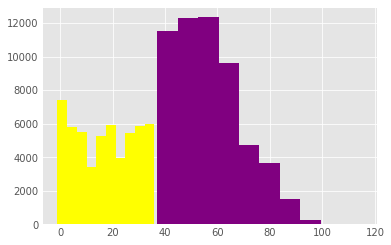

In [33]:
#the distrution comparison between people under the age of 37 and over the age of 37 
df_a.age.hist(color = 'purple');
df_b.age.hist(color = 'yellow');

* Majority of patients are over 40 years (Purple ) this are the older generation 
* the younger generation are in yellow 

In [34]:
#ensuring that in each age group is repeated once 
ages = df.shape[0]
ages == df_a['no_show'].count() + df_b['no_show'].count() 

True

* The out put is True, indiicating there is no duplication of the values which is needed for accuracy

Text(0,0.5,'Count')

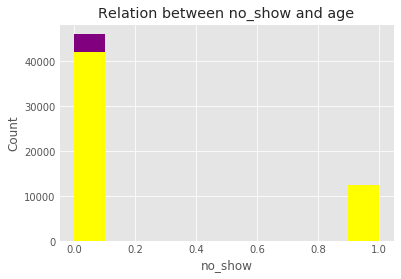

In [35]:
#comparing the no show of the Genders 
df_a.no_show.hist(color = "purple")
df_b.no_show.hist(color = "yellow")

plt.title('Relation between no_show and age')
plt.xlabel('no_show')
plt.ylabel('Count')

* The Group A has a hgh no show count than the group B

Text(0,0.5,'Count')

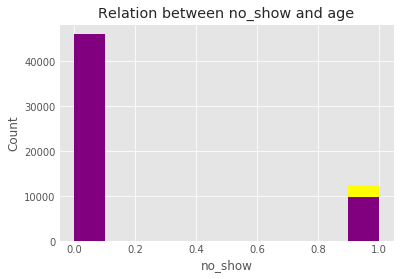

In [36]:
#this is to clearly illustrate the difference 
df_b.no_show.hist(color = "yellow")
df_a.no_show.hist(color = "purple")
plt.title('Relation between no_show and age')
plt.xlabel('no_show')
plt.ylabel('Count')

* This chart is an illlustration to clearly see the difference in the count of no show between group A and group B

#### Answer
In conclusion the age group A (the older generation ) have a high chance of not showing up for the appointments than the age groub B ( the younger generation ), 

### 3 Diagnosis 
* 	c) What’s the correlation between the diagnosis of the patient and showing up?


**Finding the counts of each diagnosis** 

In [37]:
df.hipertension.value_counts() 

0    88726
1    21801
Name: hipertension, dtype: int64

In [38]:
df.diabetes.value_counts() 

0    102584
1      7943
Name: diabetes, dtype: int64

In [39]:
df.alcoholism.value_counts() 

0    107167
1      3360
Name: alcoholism, dtype: int64

In [40]:
df.handcap.value_counts() 

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

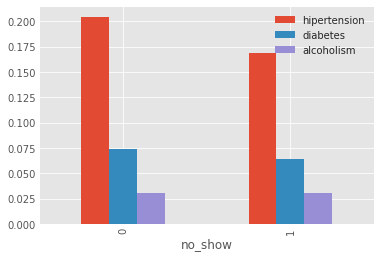

In [41]:
#this is to illustrate the type of diagnosis that is likely not to show up 
dig = df[["no_show","hipertension","diabetes","alcoholism"]].groupby('no_show').mean()
dig.mul(100)
dig.plot.bar()

#### Answer 
The Number of patients with hipertention are more likely to not to show up compared to Diabetes and alcoholism

### 4 Date Difference
* d) Does the time gap between the scheduled day and appoinmtment day affect the likelyhood of a patient  to show up?

Below we will separate the time and day for the columns scheduledday and appointmentday and create new columns

In [42]:
#separating the timestamp from the dates 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['SchDay'] = df['scheduledday'].dt.date
df.head(3)


patientid  appointmentid  gender        scheduledday  \
0  2.987250e+13        5642903     1.0 2016-04-29 18:38:08   
1  5.589978e+14        5642503     0.0 2016-04-29 16:08:27   
2  4.262962e+12        5642549     1.0 2016-04-29 16:19:04   

         appointmentday  age    neighbourhood  scholarship  hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56  JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62    MATA DA PRAIA            0             0   

   diabetes  alcoholism  handcap  sms_received  no_show  age_grp      SchDay  
0         0           0        0             0        0  seniors  2016-04-29  
1         0           0        0             0        0  seniors  2016-04-29  
2         0           0        0             0        0  seniors  2016-04-29

In [43]:
#separating the timestamp from the dates 

df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['ApptDay'] = df['appointmentday'].dt.date
df.head(3)

patientid  appointmentid  gender        scheduledday appointmentday  \
0  2.987250e+13        5642903     1.0 2016-04-29 18:38:08     2016-04-29   
1  5.589978e+14        5642503     0.0 2016-04-29 16:08:27     2016-04-29   
2  4.262962e+12        5642549     1.0 2016-04-29 16:19:04     2016-04-29   

   age    neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0   62  JARDIM DA PENHA            0             1         0           0   
1   56  JARDIM DA PENHA            0             0         0           0   
2   62    MATA DA PRAIA            0             0         0           0   

   handcap  sms_received  no_show  age_grp      SchDay     ApptDay  
0        0             0        0  seniors  2016-04-29  2016-04-29  
1        0             0        0  seniors  2016-04-29  2016-04-29  
2        0             0        0  seniors  2016-04-29  2016-04-29

* the above code removes the time from date in the scheduled and appointment day and creates new columns which will be used on the code below
* using the below code we get the day difference between the scheduled day and appoinment day  

In [44]:
#using apply fuction to create a column that will show the difference between the appointment day and the actual scheduled day
df['datediff'] = df.apply(
    lambda row: row.ApptDay - row.SchDay, axis=1)
df.head(3)

patientid  appointmentid  gender        scheduledday appointmentday  \
0  2.987250e+13        5642903     1.0 2016-04-29 18:38:08     2016-04-29   
1  5.589978e+14        5642503     0.0 2016-04-29 16:08:27     2016-04-29   
2  4.262962e+12        5642549     1.0 2016-04-29 16:19:04     2016-04-29   

   age    neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0   62  JARDIM DA PENHA            0             1         0           0   
1   56  JARDIM DA PENHA            0             0         0           0   
2   62    MATA DA PRAIA            0             0         0           0   

   handcap  sms_received  no_show  age_grp      SchDay     ApptDay datediff  
0        0             0        0  seniors  2016-04-29  2016-04-29   0 days  
1        0             0        0  seniors  2016-04-29  2016-04-29   0 days  
2        0             0        0  seniors  2016-04-29  2016-04-29   0 days

* we have created another column named Datediff which calculates the days between scheduled day and appointment day , by subtracting the new row apptday from schday that we created earlier on

In [45]:
#changing the data type from string  to type int
df['datediff'] = df['datediff'].astype(int, errors = 'raise')
df.dtypes
#changing the data type will anable us to plot the feature 

patientid                float64
appointmentid              int64
gender                   float64
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                    int64
age_grp                 category
SchDay                    object
ApptDay                   object
datediff                   int64
dtype: object

* The datediff datatype is converted into int from string in order to properly visualize the column 

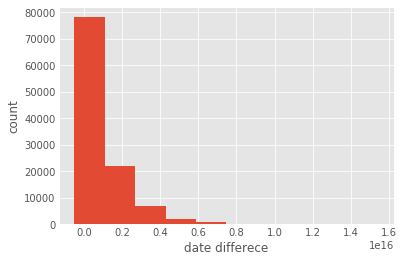

In [46]:
#the distrubtion of the number of days 
df.datediff.hist()

plt.xlabel('date differece')
plt.ylabel('count')
plt.show()

Majority of the day difference are mainly between 0 - 2 days 

In [47]:
#grouping the new column by no show 
date = df[["no_show","datediff"]].groupby(['no_show'], as_index=False ).mean()
date.head()


no_show      datediff
0        0  7.564026e+14
1        1  1.367841e+15

* this indicates that For patients with a longer date difference have a higher count of not showing up 

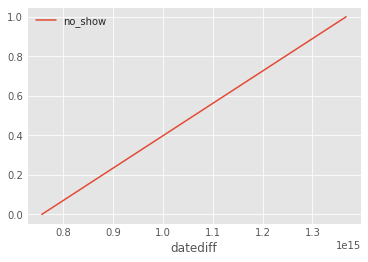

In [48]:
#plot
date.plot('datediff', 'no_show')


#### Answer
* The more the number of days from the scheduled day to the appointment day the more likely the patient wont show up. This might occur if the patient has forgotten about the appointment, if the date difference is less than a week the patient is more likely to show up that appoitnment 

<a id='conclusions'></a>
## Conclusions

The features to consider when looking for patients that are more likely to show up :: 
* Gender <br>
As per the visualization there are equally more likely not show up, gender have no significant impact on determining weather a patient will show up for the appointment. 
* Diagnosis of the patients<br>
Patients with the medical conditions of  alcoholism and diabetes are more likely to show up compared to hipertension conditions.
* Age<br>
The older generation patients are more likely not to show up for their appointment as compared to the the younger generation group.  
* The difference in Days<br>
The longer the difference between the scheduled day and the appointment day the more likely the patient wont show up for the appointment. 
##### The data isnt sufficient to decide on the correlation between variables, the sms sent and scholarship variables do not have a strong correlation with the other varibles especially the independent variable (no show )
* Sms sent  <br>
There is little impact of sending the sms to the patient in order for them to show up for the appointment, but from the data set does not seem to be case ,  *the corrrelation it can not be explained* . (patients receiving a sms or see the sms will be reminided of their appointment and more likey to attends)
* Scholarship <br> 
For patients having a scholarship there is little no impact to detarmine if a patient will show up for an appointment, in the data set it does not seem to be the case, having a scholarship should be factor to motivate patients to attend their appointments

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Noshow.ipynb'])

255